In [ ]:
!pip install pennylane

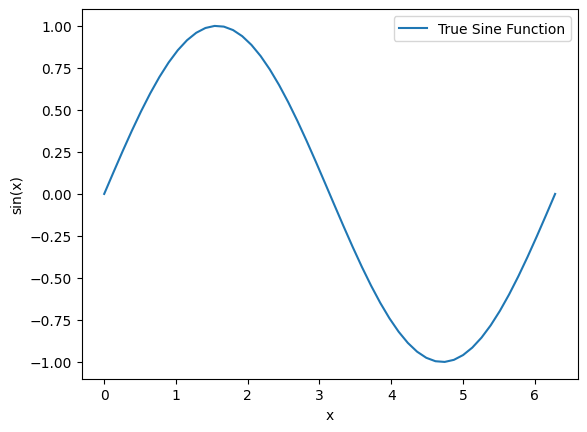

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Discretize the interval [0, 2π]
num_points = 50
x = np.linspace(0, 2 * np.pi, num_points)
y = np.sin(x)

# Plot the sine function
plt.plot(x, y, label='True Sine Function')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.legend()
plt.show()

#QML model -1

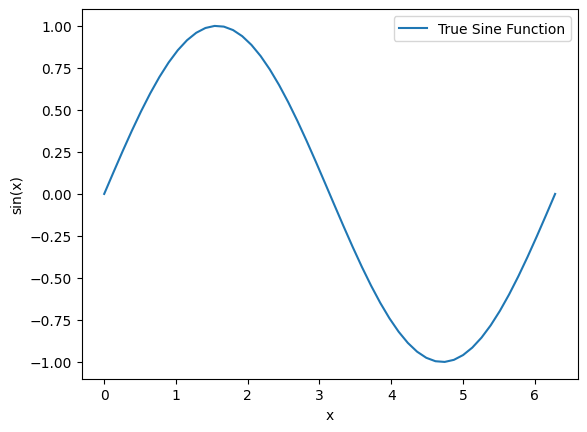

Epoch 0: Loss = 0.9998881421768864
Epoch 10: Loss = 0.9988963632221676
Epoch 20: Loss = 0.9815515197694679
Epoch 30: Loss = 0.7395241083330438
Epoch 40: Loss = 0.05819097795381658
Epoch 50: Loss = 0.019097313491566795
Epoch 60: Loss = 0.004613631168895671
Epoch 70: Loss = 0.00021881697784796684
Epoch 80: Loss = 0.0006957826247506149
Epoch 90: Loss = 5.6001700576052053e-05


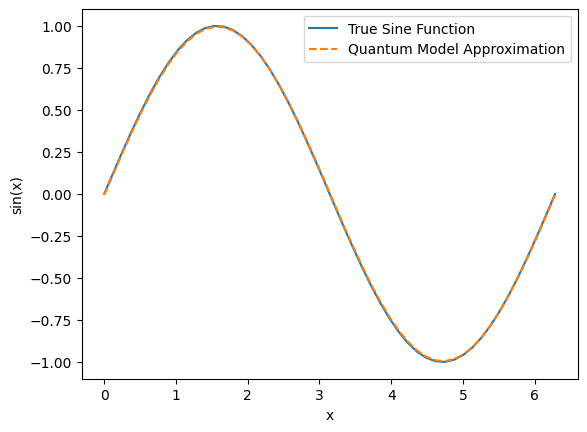

In [ ]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

# Define the quantum device
dev = qml.device("default.qubit", wires=2)

# Define the quantum circuit
@qml.qnode(dev)
def circuit(weights, x):
    qml.AngleEmbedding(x, wires=[0, 1])
    qml.StronglyEntanglingLayers(weights, wires=[0, 1])
    return qml.expval(qml.PauliZ(0))

# Discretize the interval [0, 2π]
num_points = 50
x = np.linspace(0, 2 * np.pi, num_points)
y = np.sin(x)

# Plot the sine function
plt.plot(x, y, label='True Sine Function')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.legend()
plt.show()

# Define the cost function
def cost(weights, x, y):
    predictions = [circuit(weights, [x_i]) for x_i in x]
    return np.mean((np.array(predictions) - y) ** 2)

# Initialize weights with the correct shape (number of layers, number of wires, number of parameters per gate)
np.random.seed(42)
weights = 0.01 * np.random.randn(2, 2, 3)

# Set up the optimizer
opt = qml.NesterovMomentumOptimizer(0.01)

# Training loop
epochs = 100
for epoch in range(epochs):
    weights = opt.step(lambda w: cost(w, x, y), weights)
    if epoch % 10 == 0:
        loss = cost(weights, x, y)
        print(f"Epoch {epoch}: Loss = {loss}")

# Evaluate the trained model
predictions = [circuit(weights, [x_i]) for x_i in x]

# Plot the results
plt.plot(x, y, label='True Sine Function')
plt.plot(x, predictions, label='Quantum Model Approximation', linestyle='dashed')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.legend()
plt.show()


#QML Model-2

Cost at step    10:  0.5531435
Cost at step    20:  0.5531435
Cost at step    30:  0.5531435
Cost at step    40:  0.5531435
Cost at step    50:  0.5531435
Cost at step    60:  0.5531435
Cost at step    70:  0.5531435
Cost at step    80:  0.5531435
Cost at step    90:  0.5531435
Cost at step   100:  0.5531435


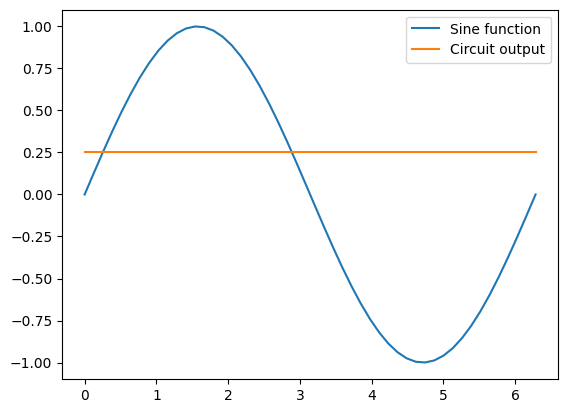

In [ ]:
import matplotlib.pyplot as plt
import pennylane as qml
import numpy as np

# Define the number of qubits and layers
n_qubits = 4
n_layers = 2

# Define the state preparation circuit
def state_preparation(params, n_layers):
    for i in range(n_layers):
        qml.RX(params[i * 2], wires=0)
        qml.RY(params[i * 2 + 1], wires=0)

# Define the variational circuit
@qml.qnode(qml.device("default.qubit", wires=n_qubits)) # Define a QNode
def circuit(params, x): # Add input x
    state_preparation(params, n_layers)
    qml.RZ(x, wires=0) # Encode the input x
    return qml.expval(qml.PauliZ(0))

# Define the cost function
def cost(params, x, y):
    # Calculate the output of the circuit for all x values
    predictions = [circuit(params, x_val) for x_val in x]

    # Calculate the mean squared error
    return np.mean((predictions - y)**2)

# Define the optimizer
optimizer = qml.AdamOptimizer(stepsize=0.1)

# Initialize the parameters
params = np.random.random(2 * n_layers)

# Discretize the interval [0, 2π]
x = np.linspace(0, 2 * np.pi, 50)
y = np.sin(x)

# Train the model
for i in range(100):
    params = optimizer.step(lambda p: cost(p, x, y), params) # Use a lambda function to pass x and y to cost
    if (i+1) % 10 == 0:
        print("Cost at step {:5d}: {: .7f}".format(i+1, cost(params, x, y)))

# Evaluate the model
circuit_output = [circuit(params, x_val) for x_val in x]

# Plot the results
plt.plot(x, y, label="Sine function")
plt.plot(x, circuit_output, label="Circuit output")
plt.legend()
plt.show()